Import necessary modules

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

Load data set

In [2]:
digit_dataset = tf.keras.datasets.mnist
(train_f, train_l), (test_f, test_l) = digit_dataset.load_data()

Dataset information

In [3]:
print(len(train_f))
train_f[0].shape

60000


(28, 28)

Normalize dataset values to range of (0, 1)

In [4]:
train_f = train_f / 255
test_f = test_f / 255
print(train_f[0][10])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05490196 0.00392157 0.60392157
 0.99215686 0.35294118 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


Display dataset

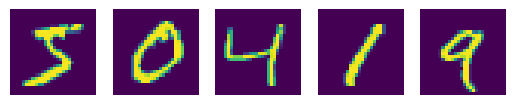

In [5]:
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(train_f[i])
    axs[i].axis('off')
plt.show()

Define a function to create a model

In [6]:
def create_model(learning_rate, metrics):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(rate=0.4),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=metrics
    )
    return model

Build a model

In [7]:
learning_rate = 0.0005
metrics = ['accuracy']
model = create_model(learning_rate, metrics)

Train the model

In [8]:
epochs = 15
batch_size = 200
history = model.fit(train_f, train_l, batch_size=batch_size, epochs=epochs)

Epoch 1/15
300/300 [==============================] - 1s 3ms/step - loss: 0.8443 - accuracy: 0.7449
Epoch 2/15
300/300 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8859
Epoch 3/15
300/300 [==============================] - 1s 3ms/step - loss: 0.3067 - accuracy: 0.9135
Epoch 4/15
300/300 [==============================] - 1s 3ms/step - loss: 0.2564 - accuracy: 0.9294
Epoch 5/15
300/300 [==============================] - 1s 3ms/step - loss: 0.2234 - accuracy: 0.9377
Epoch 6/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1964 - accuracy: 0.9452
Epoch 7/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1780 - accuracy: 0.9500
Epoch 8/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1600 - accuracy: 0.9561
Epoch 9/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1481 - accuracy: 0.9581
Epoch 10/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1374 - accuracy: 0.9615

Plot training history

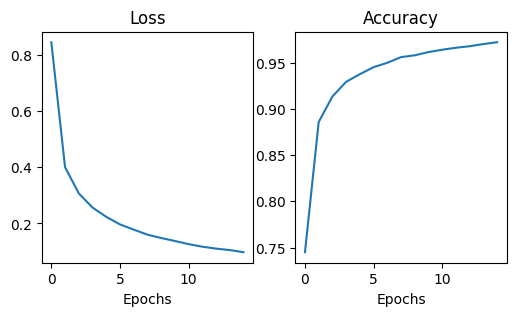

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].plot(history.epoch, history.history['loss'])
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[1].plot(history.epoch, history.history['accuracy'])
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
plt.show()

Evaluate the model

In [10]:
model_loss, model_accuracy = model.evaluate(test_f, test_l)
print("The loss is: {} | The accuracy is: {}".format(model_loss, model_accuracy))

313/313 [==============================] - 1s 1ms/step - loss: 0.0867 - accuracy: 0.9730
The loss is: 0.08671671897172928 | The accuracy is: 0.9729999899864197


Make predictions

In [11]:
predictions = model.predict(test_f)
print(predictions[0])

313/313 [==============================] - 0s 1ms/step
[6.4064659e-07 4.2102333e-06 1.5884324e-04 8.5170599e-05 5.6240020e-07
 1.0468452e-06 1.8544918e-08 9.9974072e-01 3.9896413e-06 4.8086272e-06]


Show result of predictions

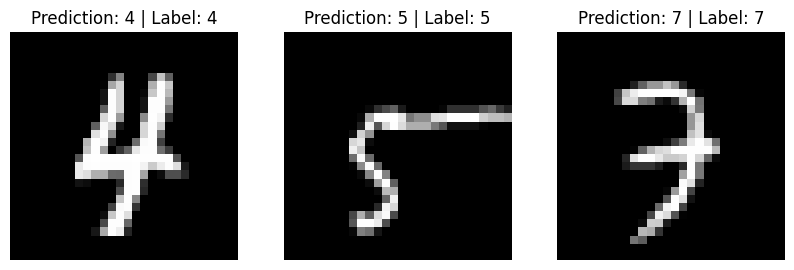

In [49]:
output_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
for i in range(3):
    idx = random.randint(0, len(test_f))
    axs[i].imshow(test_f[idx], 'gray')
    axs[i].set_title('Prediction: {} | Label: {}'.format(output_classes[np.argmax(predictions[idx])], test_l[idx]))
    axs[i].axis('off')
plt.show()